# Pipelines in Machine Learning (Pipeline: chaining estimators)

- A pipeline is a process of sequentially applying a list of transformers and a final estimator i.e, a pipeline is a series of steps executed in an ordered to automate the machine learning workflow.
- Pipelines are majorly useful while deploying the model, where the steps are performed sequentially on the given data.
- We have to call 'fit' (on train data), 'predict' (on test data) on the data to fit the whole sequence of estimators created

- We can use pipelines (from built-in libraries) either from sklearn or imblearn
    - from sklearn.pipeline import Pipeline
    - from imblearn.pipeline import Pipeline
    - We use imblearn only when we want to use samplers in pipeline
    
    
--> **Reasons to use pipelines:**

    1. Efficiency - Pipelines automate repetative tasks thus reducing the manual intervention and saving time
    2. Consistency - Pipelines are defined with a fixed workflow and they are implemented sequentially (model training steps remain constant throughout the project) making it easy in transition from production to deployment
    3. Scalability - Pipelines can be designed and scaled as the project grows
    4. Modularity - Pipelines enable the easy addition, removal, or modification of components without disrupting the entire workflow. 
    
    
    
--> **ML model training pipeline:**

    1. Data Ingestion - In this step data is collencted from the source, such as database, files, APIs etc.,
    2. Data Preprocessing - Raw data is often noise, contains missing values, this preprocessing stage involves cleaning the data, transforming and encoding making the data suitable for the machine learning algorithms. Common steps in the data preprocessing include treating missing values, incorrect datatypes, transformation, encoding
    3. Feature Engineering - In this stage, new features are created using the existing data to improve model performance (such as dimensionality reduction, feature selection, feature extraction)
    4. Model Training - The model (choosen ML algorithm) is then trained on the preprocessed data. This process involves adjesting the model's parameters to minimize the loss function.
    5. Model Validation - The created model should be tested with the validation dataset (the dataset model hasn't seen before), this step is crucial to check the performance of the model (generalization).
    6. Hyperparameter Tuning - Here in this step, we have to search for the optimal set of values that minimizes the validation error and helps achieveing the best possible performance of the model (Hyperparamets are the parameters of the ML algorithm that are set before the training begins)
 
 
--> **Along with the advantages discussed pipelines are alos challenging in the following ways:**

    1. Complexity: Designing a pipeline requires understanding the dependencies between components and managing intricate workflows.
    2. Tool selection: Choosing the right tools and libraries can be overwhelming due to the vast number of options available.
    3. Integration: Combining different tools and technologies may require custom solutions or adapters, which can be time-consuming to develop.
    4. Debugging: Identifying and fixing issues within a pipeline can be difficult due to the interconnected nature of the components

#### Let's initially start a pipeline that performs scaling and modelling

In [1]:
from sklearn.pipeline import Pipeline

#feature scaling
from sklearn.preprocessing import StandardScaler

#model
from sklearn.linear_model import LogisticRegression

In [2]:
#initialize the steps we want perform sequentially
#these steps should be a list with key-value inside a tuple

steps = [('standard_scaler', StandardScaler()),
        ('model', LogisticRegression())]

In [3]:
steps

[('standard_scaler', StandardScaler()), ('model', LogisticRegression())]

In [4]:
pipe = Pipeline(steps)
pipe

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('model', LogisticRegression())])

In [5]:
#we can also visuzalize using set_config visualizing pipeline
from sklearn import set_config

In [6]:
set_config(display='diagram')
pipe

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('model', LogisticRegression())])

In [7]:
#create dataset
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=200)

In [8]:
X.shape

(200, 20)

In [9]:
y.shape

(200,)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
X_test.shape

(40, 20)

In [12]:
X_train

array([[ 2.10269722, -1.45290733, -0.79208765, ...,  0.7138159 ,
        -0.88455122,  0.74152932],
       [ 0.06467105, -0.96268001, -0.3719379 , ...,  1.27476612,
        -1.0455631 , -0.69619439],
       [ 0.77622353, -1.6724818 , -0.60888646, ..., -0.24024485,
         1.03612803,  0.61720647],
       ...,
       [-0.11637333, -2.25133249,  0.2784083 , ...,  0.9791436 ,
         1.78117968,  0.43350504],
       [-0.88685905, -0.0064142 , -0.63104365, ..., -0.76761549,
        -0.07025435, -0.22275399],
       [ 0.33191505, -0.17832865,  1.97099907, ..., -0.8813084 ,
         1.19409453, -1.1699808 ]])

In [13]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('model', LogisticRegression())])

In [14]:
#during prediction piplines perform only transform
y_pred = pipe.predict(X_test)

In [15]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0])

### - Now lets try to include some more steps inside the pipeline

In [16]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [17]:
steps = [('standard_scaler', StandardScaler()),
        ('PCA', PCA(n_components=5)),
        ('SVC', SVC())]
steps

[('standard_scaler', StandardScaler()),
 ('PCA', PCA(n_components=5)),
 ('SVC', SVC())]

In [18]:
pipe_1 = Pipeline(steps)
pipe_1

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('PCA', PCA(n_components=5)), ('SVC', SVC())])

In [19]:
#now perform every task included in the pipeline
pipe_1.fit(X_train, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('PCA', PCA(n_components=5)), ('SVC', SVC())])

In [20]:
pipe_1.predict(X_test)

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0])

### Accessing Steps 

we can also make the pipe perform only one task (of many tasks initiated) instead of doing everything thats included in the pipeline

In [21]:
pipe_1['standard_scaler'].fit_transform(X_train)

array([[ 2.23771502, -1.40368064, -0.89159109, ...,  0.65159439,
        -0.66096327,  0.74527549],
       [ 0.03201156, -0.90944802, -0.47631076, ...,  1.18228926,
        -0.78938599, -0.79823949],
       [ 0.80210656, -1.62504911, -0.71051315, ..., -0.25100824,
         0.87096633,  0.61180466],
       ...,
       [-0.16392814, -2.20862919,  0.16649812, ...,  0.90261141,
         1.46521791,  0.41458602],
       [-0.99780507,  0.05463079, -0.73241354, ..., -0.74993466,
        -0.01148185, -0.28996217],
       [ 0.32124288, -0.11868826,  1.83947225, ..., -0.85749545,
         0.99696007, -1.30688826]])

In [22]:
pipe_1[0]

StandardScaler()

In [23]:
#the estimators are stored as a list elements
pipe_1[0].fit_transform(X_train)

array([[ 2.23771502, -1.40368064, -0.89159109, ...,  0.65159439,
        -0.66096327,  0.74527549],
       [ 0.03201156, -0.90944802, -0.47631076, ...,  1.18228926,
        -0.78938599, -0.79823949],
       [ 0.80210656, -1.62504911, -0.71051315, ..., -0.25100824,
         0.87096633,  0.61180466],
       ...,
       [-0.16392814, -2.20862919,  0.16649812, ...,  0.90261141,
         1.46521791,  0.41458602],
       [-0.99780507,  0.05463079, -0.73241354, ..., -0.74993466,
        -0.01148185, -0.28996217],
       [ 0.32124288, -0.11868826,  1.83947225, ..., -0.85749545,
         0.99696007, -1.30688826]])

In [24]:
pipe_1[:1]

Pipeline(steps=[('standard_scaler', StandardScaler())])

In [25]:
pipe_1[:2]

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('PCA', PCA(n_components=5))])

In [26]:
pipe_1.steps[0]

('standard_scaler', StandardScaler())

#### make_pipeline 

The utility function make_pipeline is a shorthand for constructing pipelines; it takes a variable number of estimators and returns a pipeline, filling in the names automatically (we dont have to assign names manually)

In [27]:
#now we have to make a custom pipeline
from sklearn.pipeline import make_pipeline

In [28]:
make_pipeline(StandardScaler(), LogisticRegression())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

###  Nested Parameters

In [29]:
from sklearn.svm import SVC

In [30]:
pipe = Pipeline(steps = [   
    ('sc', StandardScaler()),
    ('pca', PCA()),
    ('clf', SVC())
    ])

pipe

Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA()), ('clf', SVC())])

- In the above step we have intialized SVC as our model but with default parameter, now if we want to change the default parameters we can do it by the following syntax -- $$\text{<estimator>__<parameter>}$$ eg: clf__degree = 2, clf__C=5

In [31]:
pipe.set_params(clf__C = 10) #the estimator C of SVC will be set to 10

Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA()), ('clf', SVC(C=10))])

In [32]:
pipe.set_params(clf__kernel = 'linear')

Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA()),
                ('clf', SVC(C=10, kernel='linear'))])

In [33]:
pipe22 = Pipeline(steps = [   
    ('sc', StandardScaler()),
    ('pca', PCA()),
    ('clf', [SVC(), LogisticRegression()])
    ])

pipe22

Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA()),
                ('clf', [SVC(), LogisticRegression()])])

#### GridSearchCV 

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = dict(pca__ncomponents = [2,4,6],
                 clf__C = [2,5,8])

grid_search_pipe = GridSearchCV(pipe,param_grid)
grid_search_pipe

GridSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA()),
                                       ('clf', SVC(C=10, kernel='linear'))]),
             param_grid={'clf__C': [2, 5, 8], 'pca__ncomponents': [2, 4, 6]})

In [36]:
param_grid = dict(clf = [LogisticRegression(), SVC()],
                 pca = ['passthrough', PCA()],
                 clf__C = [2,4,6],
                 pca__n_components = [2,4,6])
GridSearchCV(pipe, param_grid)

GridSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA()),
                                       ('clf', SVC(C=10, kernel='linear'))]),
             param_grid={'clf': [LogisticRegression(), SVC()],
                         'clf__C': [2, 4, 6], 'pca': ['passthrough', PCA()],
                         'pca__n_components': [2, 4, 6]})

## Column Transformer
- Each column transformer consists of three-element tuple
    - (Name, Object, Columns) i.e, Name of the transformer, The transformer to be applied, Columns (column indices) on which the transformer should be applied
    - Example: **[('scaling', StandardScaler(), [0,1])]** The scaling technique given the name 'scaling' which is the StandardScaler() will be applied on the columns 0,1. We can also pass the column names.
    - The purpose of the name of the transformer is to apply a particular transformer on the data, say we are performing scaling, pca,model, but we are only interested in performing scaling for some reasons then we can call only that particular transformer using the name assigned.
- We can also create multiple pipelines and combine them

In [37]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

#### Simple column transformer 

In [38]:
from sklearn.compose import ColumnTransformer

In [39]:
#supplying the scaling and encoding techniques directly
col_transformer = ColumnTransformer(
    [
        ('sc', StandardScaler(), [0,1]),
        ('imp', SimpleImputer(strategy='mean'), [0,1]),
        ('ohe', OneHotEncoder(), [2,3])
    ])

col_transformer

ColumnTransformer(transformers=[('sc', StandardScaler(), [0, 1]),
                                ('imp', SimpleImputer(), [0, 1]),
                                ('ohe', OneHotEncoder(), [2, 3])])

In [40]:
make_pipeline(col_transformer, LogisticRegression())

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('sc', StandardScaler(),
                                                  [0, 1]),
                                                 ('imp', SimpleImputer(),
                                                  [0, 1]),
                                                 ('ohe', OneHotEncoder(),
                                                  [2, 3])])),
                ('logisticregression', LogisticRegression())])

In [41]:
#another way
t = [('sc', StandardScaler(), [0,1]),
   ('imp', SimpleImputer(strategy='mean'), [0,1]),
   ('ohe', OneHotEncoder(), [2,3])]

transformers = ColumnTransformer(transformers=t)

#make_pipeline
pip = make_pipeline(transformers, LogisticRegression())
pip

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('sc', StandardScaler(),
                                                  [0, 1]),
                                                 ('imp', SimpleImputer(),
                                                  [0, 1]),
                                                 ('ohe', OneHotEncoder(),
                                                  [2, 3])])),
                ('logisticregression', LogisticRegression())])

>**Any columns that are not passed will be dropped by default and to change that, we need to pass an argument called 'reminder' which should be set to 'passthrough'**
>- When the reminder argument is passed then only the mentioned columns will be transformed and the rest will be passed as they are

In [42]:
t = [('ohe', OneHotEncoder(), [2,3])]

ColumnTransformer(transformers=t, remainder='passthrough') # by default remainder='drop'
    # transformers argument should be a list of tuples

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(), [2, 3])])

#### Creating multuiple pipelines and merging them 

In [43]:
#numerical processing
steps = [('imputation', SimpleImputer(strategy='mean'))]

num_pipe = Pipeline(steps)
num_pipe

Pipeline(steps=[('imputation', SimpleImputer())])

In [44]:
#categorical processing
steps = [('imputation', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder())]

#we can also fill with any other constant
#SimpleImputer(fill_value='missing', strategy='constant')
cat_pipe = Pipeline(steps)
cat_pipe

Pipeline(steps=[('imputation', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder())])

In [45]:
preprocessor = ColumnTransformer(
    [
        ('categorical', cat_pipe, ['gender', 'qualification']),
        ('numerical', num_pipe, ['age'])
    ]
)

preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe', OneHotEncoder())]),
                                 ['gender', 'qualification']),
                                ('numerical',
                                 Pipeline(steps=[('imputation',
                                                  SimpleImputer())]),
                                 ['age'])])

In [46]:
final_pipeline = make_pipeline(preprocessor, LinearRegression())
final_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'qualification']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer())]),
                                                  ['age'])])),
                ('linearregression', LinearRegression())])

OR we can also use

In [47]:
Pipeline(
    [
        ('t',preprocessor),
        ('m', LinearRegression())
    ])

Pipeline(steps=[('t',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'qualification']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer())]),
                                                  ['age'])])),
                ('m', LinearRegression())])

#### Difference between Pipeline and make_pipeline 

- If we clearly observe the way we passed the steps inside the Pipeline and make_pipeline there are some differences between them and they can be listed as:

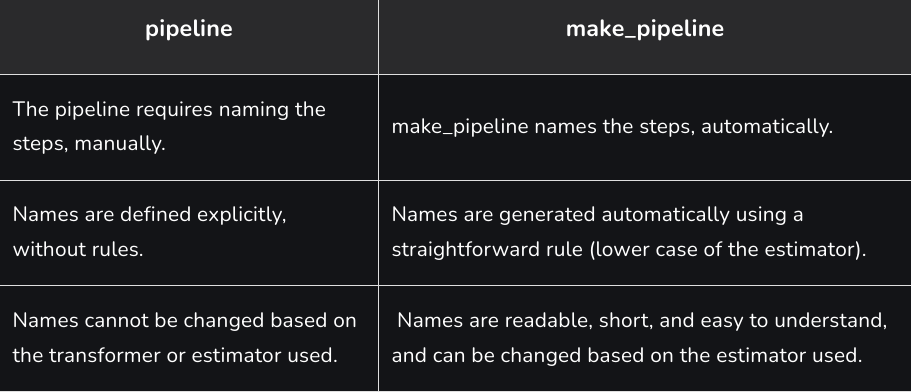

In [48]:
import pandas as pd

In [49]:
data = {'gender':['M','F', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'M', np.nan, 'M'],
       'age':[27,30,23,28,np.nan, 32, 35, 26, np.nan, 43, 36, 31],
       'qualification':['Bachelors', 'Bachelors', 'Bachelors', 'Masters', 'Bachelors', 'Masters', 'Phd', 
                        'Masters','Masters', 'Phd', 'Bachelors', 'Masters'],
       'income':[25,30,22,28,41,32,42,38,30,35,33,28]}

df = pd.DataFrame(data)
df

,gender,age,qualification,income
0,M,27.0,Bachelors,25
1,F,30.0,Bachelors,30
2,M,23.0,Bachelors,22
3,M,28.0,Masters,28
4,F,NaN,Bachelors,41
5,M,32.0,Masters,32
6,F,35.0,Phd,42
7,F,26.0,Masters,38
8,M,NaN,Masters,30
9,M,43.0,Phd,35


In [50]:
X = df[['gender', 'age', 'qualification']]
y = df.income

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [52]:
X_train.shape

(8, 3)

In [53]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'qualification']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer())]),
                                                  ['age'])])),
                ('linearregression', LinearRegression())])

In [54]:
y_test

6     42
11    28
4     41
10    33
Name: income, dtype: int64

In [55]:
y_pred = final_pipeline.predict(X_test)
y_pred

array([40.56734052, 30.61563059, 31.16004553, 25.20448756])

#### Testing on an unknown data 

In [56]:
test_data = pd.DataFrame(
    {'gender':[np.nan, 'M'],
    'age':[35, 26],
    'qualification':['Masters', 'Bachelors']})
test_data = pd.DataFrame(test_data)

final_pipeline.predict(test_data)

array([31.45179123, 23.11408596])

# Working on diabetic dataset 

In [57]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [58]:
#load dataset
def load_dataset(path):
    df = pd.read_csv(path)
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    display('X :',X, 'y :',y)
    print('*'*50)
    print(X.info())
    print('Null Values in y :',y.isnull().sum())
    return X,y

In [59]:
X,y = load_dataset('pima-indians-diabetes.csv')

'X :'

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


'y :'

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Class, Length: 768, dtype: int64

**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB
None
Null Values in y : 0


In [60]:
def check_skew(df):
    for i in df.columns:
        print('skewness for {} is {}'.format(i,df[i].skew()))
        
check_skew(X)

skewness for Pregnancies is 0.9016739791518588
skewness for Glucose is 0.17375350179188992
skewness for BloodPressure is -1.8436079833551302
skewness for SkinThickness is 0.10937249648187608
skewness for Insulin is 2.272250858431574
skewness for BMI is -0.42898158845356543
skewness for DiabetesPedigreeFunction is 1.919911066307204
skewness for Age is 1.1295967011444805


In [61]:
#define a function that checks the skewness and converts if the data is skewed
def transform(df):  
    for i in df.columns:
        skew = df[i].skew()
        skew_threshod = 1
        
        if skew>skew_threshod or skew<-skew_threshod:
            if skew>1:
                check_root_skew = np.power(df[i], 1/35).skew()
                df[i] = np.power(df[i], 1/35)
                #print(i,':',check_root_skew)

            if skew<-1:
                check_power_skew = np.power(df[i], 2).skew()
                df[i] = np.power(df[i], 2)
                #print(i,':',check_power_skew)
        #else:
            #print(i,':',df[i].skew())
    return df
            
def root_trans(i):
    for i in args:
        return np.power(df[i], 1/35)

def power_trans(i):
    for i in args:
        return np.power(df[i], 2)
    
    
transformed_X = transform(X)
transformed_X.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure               0.122836
SkinThickness               0.109372
Insulin                    -0.049757
BMI                        -0.428982
DiabetesPedigreeFunction    0.156012
Age                         0.615204
dtype: float64

In [62]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=0)

In [63]:
logistic_pipeline = make_pipeline(
    FunctionTransformer(transform),
    LogisticRegression()
)

decision_tree_pipeline = make_pipeline(
    FunctionTransformer(transform),
    DecisionTreeClassifier()
)

svc_pipeline = make_pipeline(
    FunctionTransformer(transform),
    SVC()
)

#transformed_data = pipeline.fit_transform(X)

In [64]:
pipelines = [logistic_pipeline, decision_tree_pipeline, svc_pipeline]
pipe_dict = {0:'Logistic Regression', 1:'Decision Tree', 2:'SVC'}

In [65]:
def model_train_predict(pipes, pipe_dict, X_train=None, X_test=None, y_train=None, y_test=None):
    #X_train = transform(X_train)
    #X_test = transform(X_test)
    for i,pipe in enumerate(pipelines):
        pipe.fit(X_train, y_train)
        print('{} test accuracy {}'.format(pipe_dict[i],pipe.score(X_test, y_test)))    

model_train_predict(pipes=pipelines,pipe_dict=pipe_dict, 
                    X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

Logistic Regression test accuracy 0.7662337662337663
Decision Tree test accuracy 0.7597402597402597
SVC test accuracy 0.6948051948051948


### Changing the default parameters 

In [66]:
svc_pipeline.steps

[('functiontransformer',
  FunctionTransformer(func=<function transform at 0x7b884fb81750>)),
 ('svc', SVC())]

In [67]:
new_svc_pipe = svc_pipeline

new_svc_pipe.set_params(svc__kernel = 'linear')

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function transform at 0x7b884fb81750>)),
                ('svc', SVC(kernel='linear'))])

In [68]:
new_svc_pipe.fit(X_train, y_train)
new_svc_pipe.score(X_test, y_test)

0.8051948051948052

### GridSearchCV 

In [69]:
param_grid = dict(svc__C = [2,4,6],
                 svc__kernel = ['linear', 'sigmoid', 'poly'])
            # C value should in general be low, to have high support vectors, hence max margin and more generalization

grid_pipe = GridSearchCV(svc_pipeline, param_grid)

In [70]:
grid_pipe.fit(X_train, y_train)

print('Best params:',grid_pipe.best_params_)
print('Best Score:',grid_pipe.best_score_)

Best params: {'svc__C': 6, 'svc__kernel': 'linear'}
Best Score: 0.767119818739171


#### - The above modelling is just to illutrsate the concept of pipeline hence accuracy is not the main concern but the process we achieve it.

# Titanic Dataset

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [72]:
df = pd.read_csv('train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [73]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [74]:
X = df.drop('Survived', axis=1)
y = df.Survived

In [75]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [76]:
#create a sep list of numerical and categorical features
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Embarked']

#creating a pipeline fro numerical features
num_pipeline = Pipeline(
    [
        ('si', SimpleImputer(strategy='mean')),
        ('sc', StandardScaler())
    ])

#creating a pipeline for categorical features
cat_pipeline = Pipeline(
    [
        ('si', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder())
    ])

#merging both the pipelines using the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features),
    ],
    remainder='passthrough'
)
   

#visualizing the pipelines created
display(num_pipeline, cat_pipeline, preprocessor)

Pipeline(steps=[('si', SimpleImputer()), ('sc', StandardScaler())])

Pipeline(steps=[('si', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder())])

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('si', SimpleImputer()),
                                                 ('sc', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('si',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe', OneHotEncoder())]),
                                 ['Sex', 'Embarked'])])

In [77]:
pipeline = Pipeline(
    [
        ('preprocess', preprocessor),
        ('clf', RandomForestClassifier(random_state=0))
    ])


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [79]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cross_val = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')

cross_val

array([0.83216783, 0.8041958 , 0.85211268, 0.76760563, 0.8028169 ])

In [80]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('si',
                                                                   SimpleImputer()),
                                                                  ('sc',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('si',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Embarked'])])),
                ('clf', RandomForestClassifier(random_state=0))])

In [81]:
from sklearn.metrics import classification_report

In [82]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       110
           1       0.86      0.71      0.78        69

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.84      0.84       179



In [83]:
param_grid = dict(
    clf__n_estimators = [60,80,120],
    clf__max_depth = [3,6,10],
    clf__criterion = ['gini', 'entropy']
)

grid_pipe = GridSearchCV(pipeline, param_grid)

grid_pipe.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('si',
                                                                                          SimpleImputer()),
                                                                                         ('sc',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('si',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder())]),
                                                                         ['Sex',
                                                                          'Embarked'])])),
                                       ('clf',
                                        RandomForestClassifier(random_state=0))]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [3, 6, 10],
                         'clf__n_estimators': [60, 80, 120]})

In [84]:
print('Best params:',grid_pipe.best_params_)
print('Best Score:',grid_pipe.best_score_)

Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 6, 'clf__n_estimators': 60}
Best Score: 0.8286417807544568


In [85]:
y_pred = grid_pipe.predict(X_test)

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.83      0.70      0.76        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179

